In [3]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
sns.set_style("white")

In [110]:
workspace = Path("C:/Users/Kieran/Documents/LUNA23-ISMI-Group7")
# workspace = Path("D:/LUNA23-ISMI-Group7")
model_id = "20230529_22_multitask_model/fold0/"

Segmentation loss = 0.24589284658432006
Segmentation score (dice) = 0.7541071534156799
Nodule-type score (balanced accuracy) = 0.8621445856019357
Malignancy score (auc) = 0.9178289872650092
Overall score = 0.8629774283869085


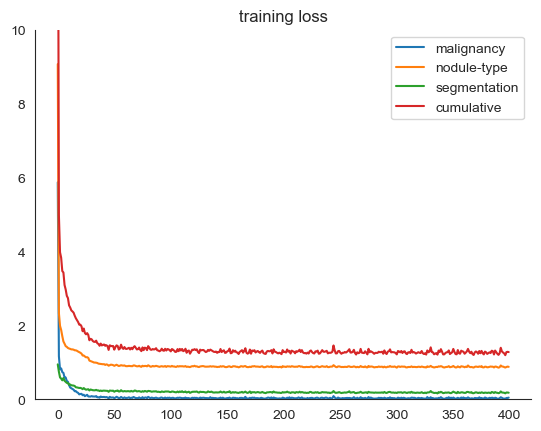

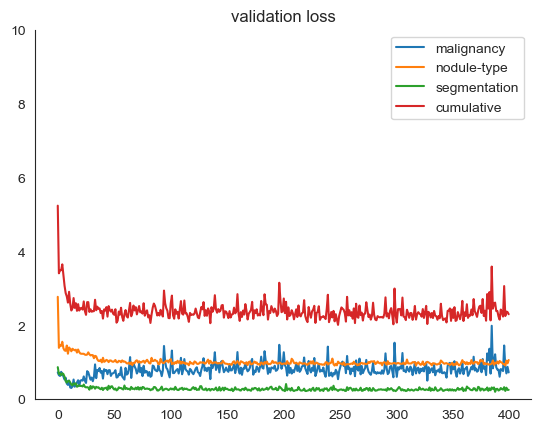

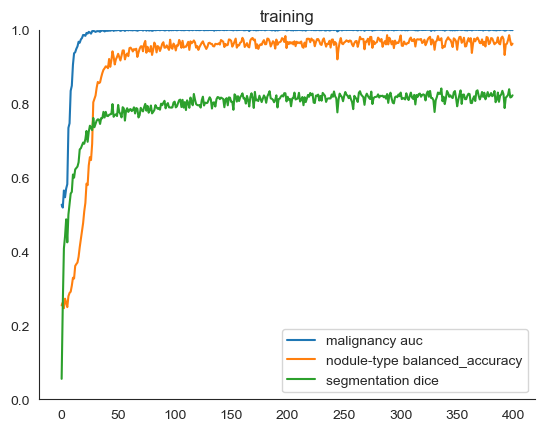

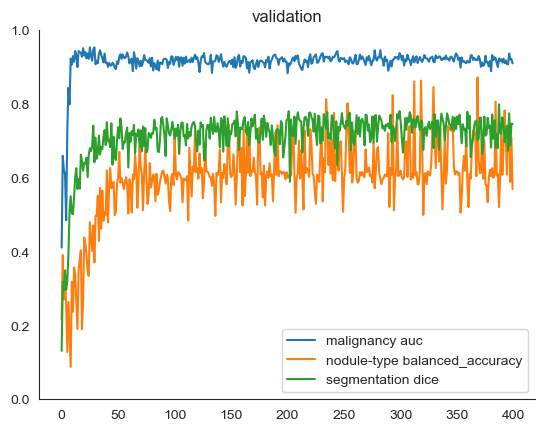

In [111]:
metrics = np.load(workspace / "results" / model_id / "metrics.npy", allow_pickle=True).item()

tasks = ["malignancy", "nodule-type", "segmentation", "cumulative"]
for mode in ["training", "validation"]:
    plt.figure()
    for task in tasks:
        plt.plot(
            [metrics[mode][i][task]["loss"] for i in range(len(metrics[mode]))],
            label=task,
        )
    plt.legend()
    plt.title(f"{mode} loss")
    plt.ylim([0, 10])
    sns.despine()

task_specific_metrics = {
    "segmentation": "dice",
    "malignancy": "auc",
    "nodule-type": "balanced_accuracy"
}

tasks = ["malignancy", "nodule-type", "segmentation"]
for mode in ["training", "validation"]:
    plt.figure()
    for task in tasks:
        plt.plot(
            [metrics[mode][i][task][task_specific_metrics[task]] for i in range(len(metrics[mode]))],
            label=f"{task} {task_specific_metrics[task]}",
        )
    plt.legend()
    plt.title(f"{mode}")
    plt.ylim([0, 1])
    sns.despine()
    
best_metrics = np.load(workspace / "results" / model_id / "best_metrics.npy", allow_pickle=True).item()
segment_loss = best_metrics['segmentation']['loss']
dice = best_metrics['segmentation']['dice']
balanced_accuracy = best_metrics['nodule-type']['balanced_accuracy']
auc = best_metrics['malignancy']['auc']
print("Segmentation loss =", segment_loss)
print("Segmentation score (dice) =", dice)
print("Nodule-type score (balanced accuracy) =", balanced_accuracy)
print("Malignancy score (auc) =", auc)
print("Overall score =", 0.5*auc + 0.25*dice + 0.25*balanced_accuracy)

In [106]:
workspace = Path("C:/Users/Kieran/Documents/LUNA23-ISMI-Group7")
# workspace = Path("D:/LUNA23-ISMI-Group7")
model_id = "20230529_22_multitask_model/fold0/"

Segmentation score (dice) = 0.7541071534156799
Nodule-type score (balanced accuracy) = 0.8621445856019357
Malignancy score (auc) = 0.9178289872650092
Overall score = 0.8629774283869085


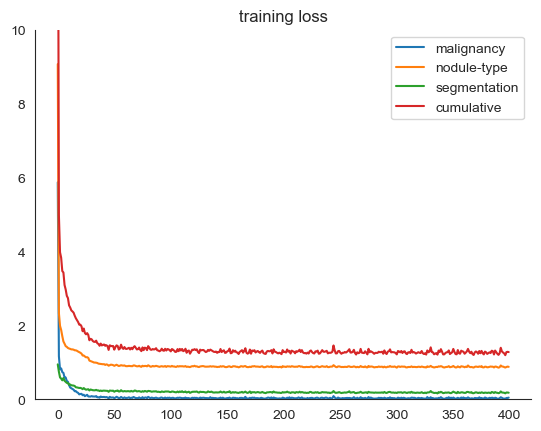

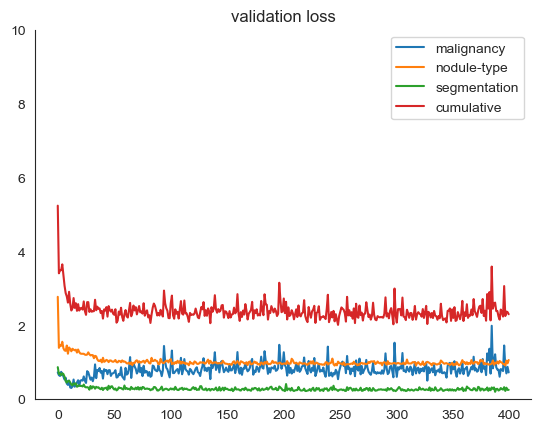

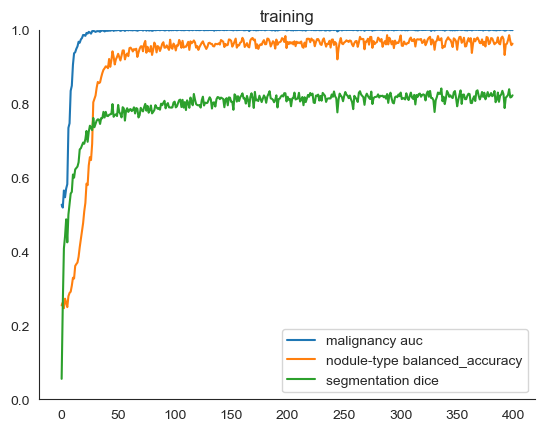

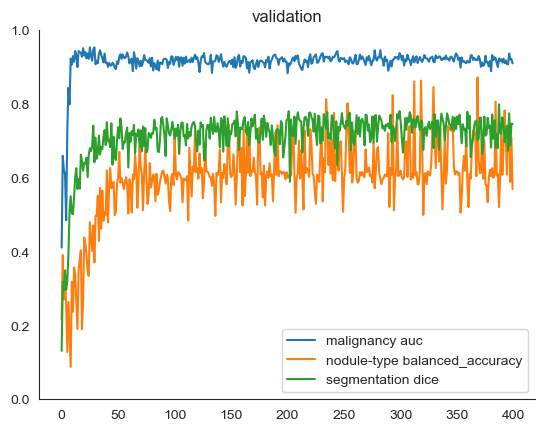

In [107]:
metrics = np.load(workspace / "results" / model_id / "metrics.npy", allow_pickle=True).item()

tasks = ["malignancy", "nodule-type", "segmentation", "cumulative"]
for mode in ["training", "validation"]:
    plt.figure()
    for task in tasks:
        plt.plot(
            [metrics[mode][i][task]["loss"] for i in range(len(metrics[mode]))],
            label=task,
        )
    plt.legend()
    plt.title(f"{mode} loss")
    plt.ylim([0, 10])
    sns.despine()

task_specific_metrics = {
    "segmentation": "dice",
    "malignancy": "auc",
    "nodule-type": "balanced_accuracy"
}

tasks = ["malignancy", "nodule-type", "segmentation"]
for mode in ["training", "validation"]:
    plt.figure()
    for task in tasks:
        plt.plot(
            [metrics[mode][i][task][task_specific_metrics[task]] for i in range(len(metrics[mode]))],
            label=f"{task} {task_specific_metrics[task]}",
        )
    plt.legend()
    plt.title(f"{mode}")
    plt.ylim([0, 1])
    sns.despine()
    
best_metrics = np.load(workspace / "results" / model_id / "best_metrics.npy", allow_pickle=True).item()
dice = best_metrics['segmentation']['dice']
balanced_accuracy = best_metrics['nodule-type']['balanced_accuracy']
auc = best_metrics['malignancy']['auc']
print("Segmentation score (dice) =", dice)
print("Nodule-type score (balanced accuracy) =", balanced_accuracy)
print("Malignancy score (auc) =", auc)
print("Overall score =", 0.5*auc + 0.25*dice + 0.25*balanced_accuracy)

In [44]:
model_id = "20230524_2_multitask_model_5fold/fold1/"
metrics = np.load(workspace / "results" / model_id / "metrics.npy", allow_pickle=True).item()

task_specific_metrics = {
    "segmentation": "dice",
    "malignancy": "auc",
    "nodule-type": "balanced_accuracy"
}

tasks = ["malignancy", "nodule-type", "segmentation"]

dice_score = []
auc_score = []
balanced_accuracy_score = []

[dice_score.append(metrics['validation'][i]['segmentation']['dice']) for i in range(len(metrics['validation']))]
[auc_score.append(metrics['validation'][i]['malignancy']['auc']) for i in range(len(metrics['validation']))]
[balanced_accuracy_score.append(metrics['validation'][i]['nodule-type']['balanced_accuracy']) for i in range(len(metrics['validation']))]

dice_score = np.array(dice_score)
auc_score = np.array(auc_score)
balanced_accuracy_score = np.array(balanced_accuracy_score)

cumulative_score_ID2 = 0.5 * auc_score + 0.25 * balanced_accuracy_score + 0.25 * dice_score

In [45]:
model_id = "20230526_8_multitask_model/fold0/"
metrics = np.load(workspace / "results" / model_id / "metrics.npy", allow_pickle=True).item()

task_specific_metrics = {
    "segmentation": "dice",
    "malignancy": "auc",
    "nodule-type": "balanced_accuracy"
}

tasks = ["malignancy", "nodule-type", "segmentation"]

dice_score = []
auc_score = []
balanced_accuracy_score = []

[dice_score.append(metrics['validation'][i]['segmentation']['dice']) for i in range(len(metrics['validation']))]
[auc_score.append(metrics['validation'][i]['malignancy']['auc']) for i in range(len(metrics['validation']))]
[balanced_accuracy_score.append(metrics['validation'][i]['nodule-type']['balanced_accuracy']) for i in range(len(metrics['validation']))]

dice_score = np.array(dice_score)
auc_score = np.array(auc_score)
balanced_accuracy_score = np.array(balanced_accuracy_score)

cumulative_score_ID8 = 0.5 * auc_score + 0.25 * balanced_accuracy_score + 0.25 * dice_score

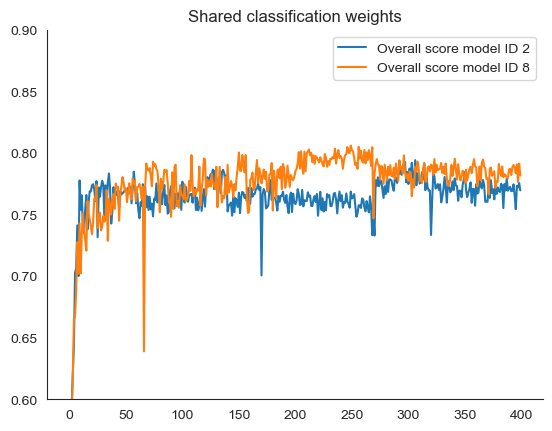

In [58]:
plt.plot(cumulative_score_ID2, label="Overall score model ID 2")
plt.plot(cumulative_score_ID8, label="Overall score model ID 8")
plt.legend()
plt.title("Shared classification weights")
plt.ylim([0.6, 0.9])
# plt.ylim([0, 1])
sns.despine()

In [88]:
labels = np.load(workspace / "results" / model_id / "labels.npy", allow_pickle=True).item()
predictions = np.load(workspace / "results" / model_id / "predictions.npy", allow_pickle=True).item()

In [89]:
predictions_nod = np.argmax(predictions['nodule-type'], axis=1)
predictions_nod

array([2, 3, 2, 2, 1, 3, 3, 3, 2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 3, 2, 2, 2,
       2, 2, 3, 3, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0,
       0, 2, 2, 2, 2, 2, 3, 0, 2, 1, 2, 2, 2, 3, 1, 1, 2, 2, 2, 3, 2, 2,
       3, 2, 3, 2, 2, 2, 3, 1, 2, 2, 2, 3, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2,
       3, 2, 0, 2, 2, 3, 2, 3, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 0, 2, 2, 2, 2, 3, 2,
       1, 0, 2, 2, 2, 3, 2, 0, 2, 2, 0, 3, 2, 2, 2, 0], dtype=int64)

In [69]:
predictions_mal = np.rint(predictions['malignancy'])
predictions_mal

array([0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1.,
       1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1.,
       0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1.,
       0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0.], dtype=float32)

In [83]:
labels['malignancy'].count(0.0)

97

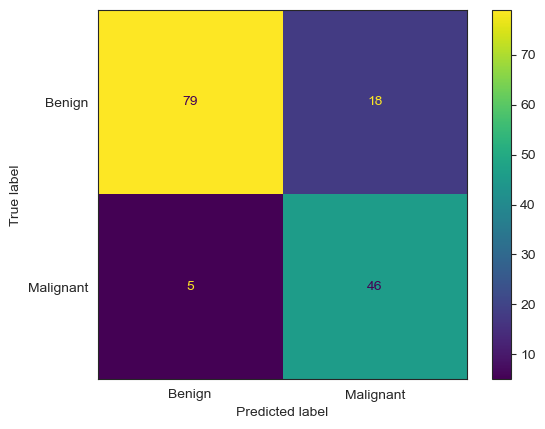

In [90]:
labels_names = ['Benign', 'Malignant']
labels_names = np.array(labels_names)
cm = confusion_matrix(labels['malignancy'], predictions_mal)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = labels_names)
disp.plot()

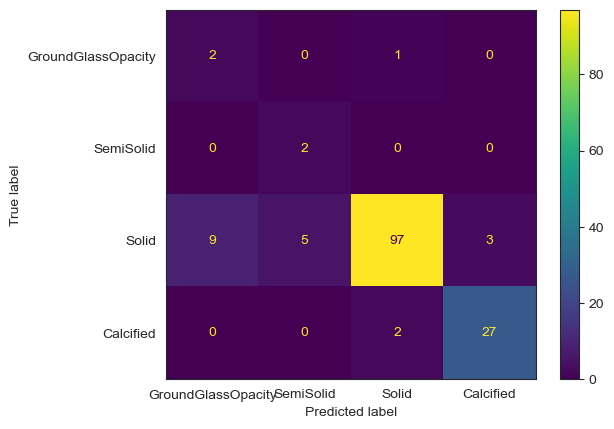

In [91]:
labels_names = ['GroundGlassOpacity', 'SemiSolid', 'Solid', 'Calcified']
labels_names = np.array(labels_names)
cm = confusion_matrix(labels['nodule-type'], predictions_nod)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = labels_names)
disp.plot()